<a href="https://colab.research.google.com/github/juccaicedoac03/Computer_Vision_Course/blob/main/1_Conceptos_preliminares/Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# DFT

<center>
<figure>
<img src='https://raw.githubusercontent.com/juccaicedoac03/Computer_Vision_Course/main/Images/DFT.png' width="500"> 
</center>

In [3]:
!gdown 1o1DmTocxkrR9stwwWsvflSQbn0Ps-e9A #Download image

Downloading...
From: https://drive.google.com/uc?id=1o1DmTocxkrR9stwwWsvflSQbn0Ps-e9A
To: /content/rhino.jpg
100% 71.8k/71.8k [00:00<00:00, 71.4MB/s]


In [9]:
im = cv2.cvtColor(cv2.imread('/content/rhino.jpg'),cv2.COLOR_BGR2GRAY)

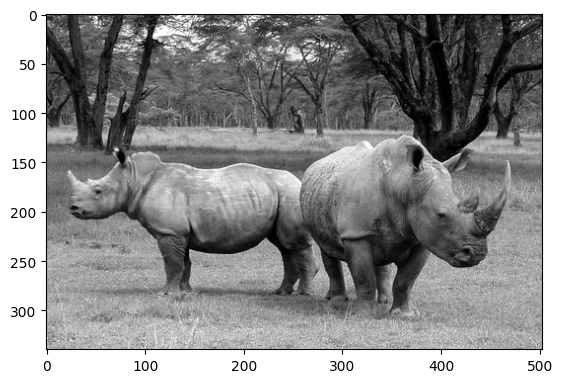

In [11]:
plt.imshow(im,'gray')
plt.show()

## FFT with the scipy.fftpack module

In [12]:
import scipy.fftpack as fp

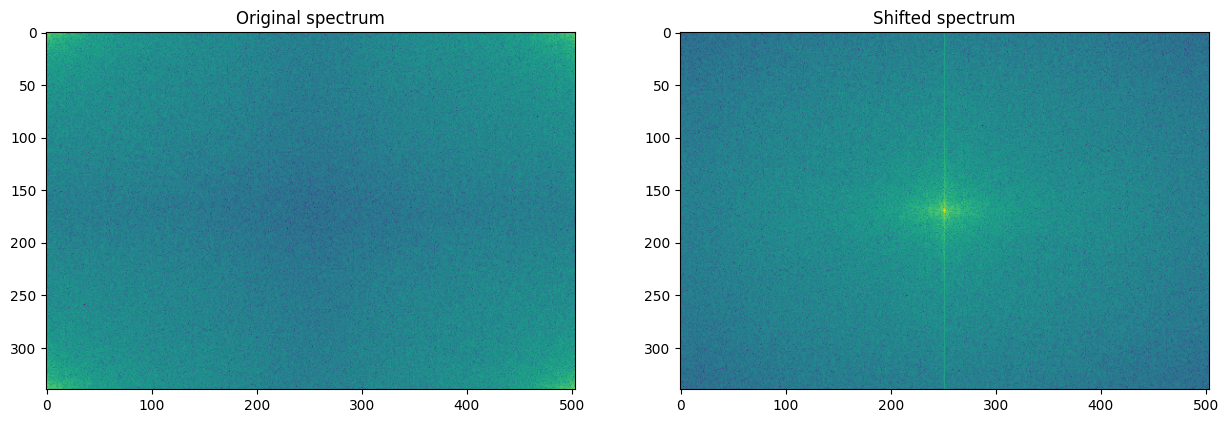

In [27]:
im_fft = fp.fft2(im)
# the quadrants are needed to be shifted around in order that the low spatial frequencies are in the center of the 2D fourier-transformed image.
im_fft_shift = fp.fftshift(im_fft)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Original spectrum')
plt.imshow((20*np.log10( 0.1 + abs(im_fft))).astype(int))

plt.subplot(1,2,2)
plt.title('Shifted spectrum')
plt.imshow((20*np.log10( 0.1 + abs(im_fft_shift))).astype(int))

plt.show()

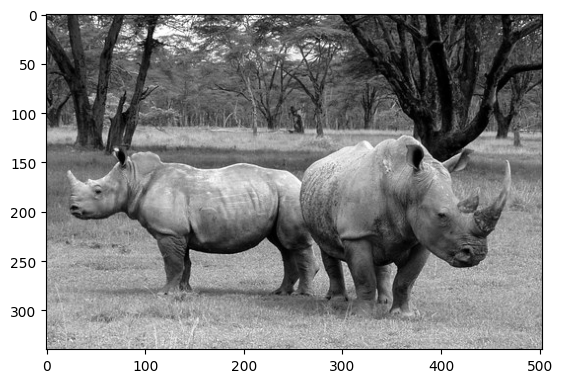

In [28]:
im_rec = fp.ifft2(im_fft).real

plt.imshow(im_rec,'gray')
plt.show()

## FFT with the numpy.fft module

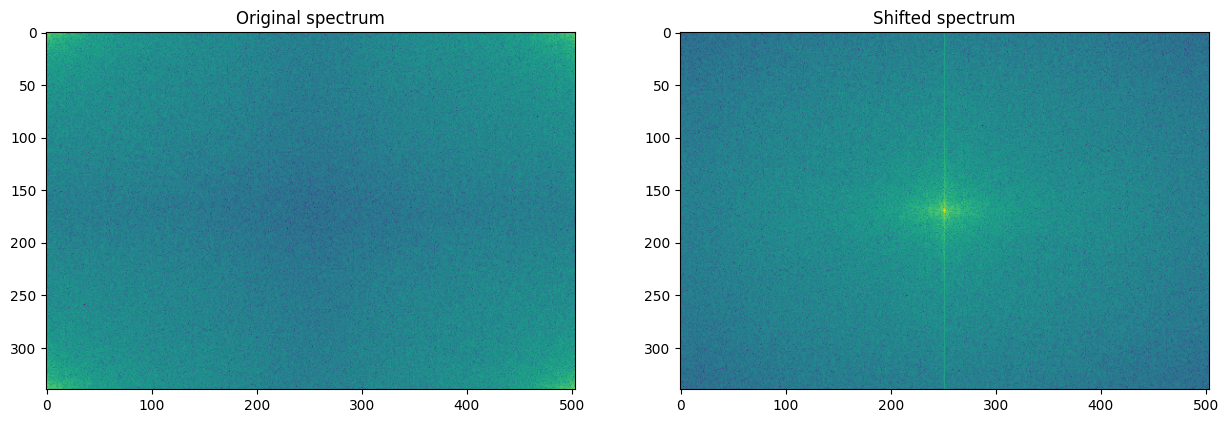

In [29]:
im_fft = np.fft.fft2(im)
# the quadrants are needed to be shifted around in order that the low spatial frequencies are in the center of the 2D fourier-transformed image.
im_fft_shift = np.fft.fftshift(im_fft)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Original spectrum')
plt.imshow((20*np.log10( 0.1 + abs(im_fft))).astype(int))

plt.subplot(1,2,2)
plt.title('Shifted spectrum')
plt.imshow((20*np.log10( 0.1 + abs(im_fft_shift))).astype(int))

plt.show()

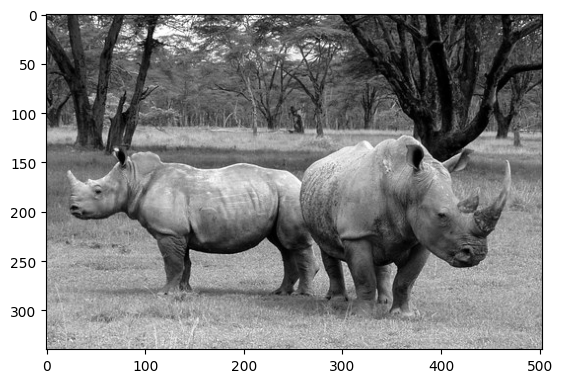

In [30]:
im_rec = np.fft.ifft2(im_fft).real

plt.imshow(im_rec,'gray')
plt.show()

## Example: Mixin spectrums

In [31]:
!gdown 1qeUCiuYfyiOnExkUIqaZSglXpE4yo2rI

Downloading...
From: https://drive.google.com/uc?id=1qeUCiuYfyiOnExkUIqaZSglXpE4yo2rI
To: /content/house.png
100% 444k/444k [00:00<00:00, 139MB/s]


In [37]:
!gdown 1G1qnTPoZvkKlh8gwA1e_y6Bkrf4x_226

Downloading...
From: https://drive.google.com/uc?id=1G1qnTPoZvkKlh8gwA1e_y6Bkrf4x_226
To: /content/house2.png
100% 367k/367k [00:00<00:00, 120MB/s]


In [38]:
im1 = cv2.cvtColor(cv2.imread('/content/house.png'),cv2.COLOR_BGR2GRAY)
im2 = cv2.cvtColor(cv2.imread('/content/house2.png'),cv2.COLOR_BGR2GRAY)

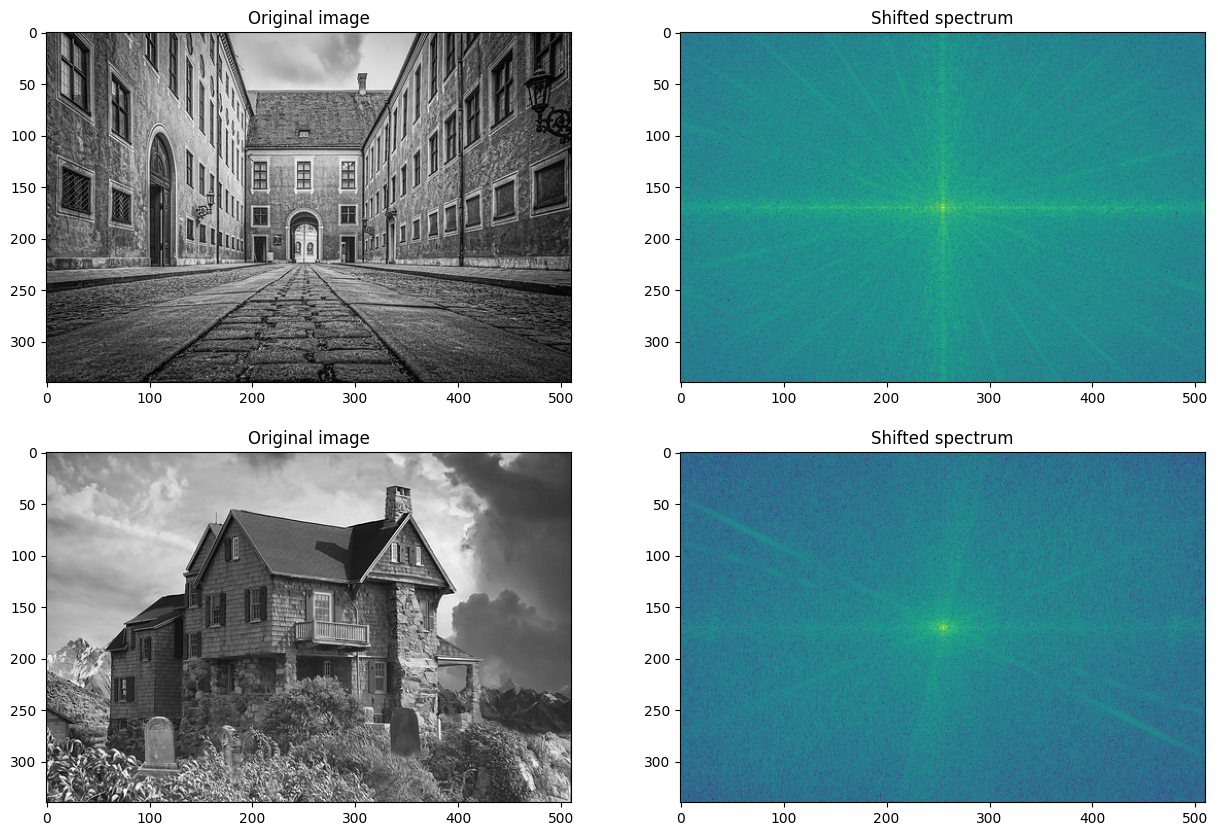

In [40]:
im1_fft = np.fft.fft2(im1)
im1_fft_shift = np.fft.fftshift(im1_fft)

im2_fft = np.fft.fft2(im2)
im2_fft_shift = np.fft.fftshift(im2_fft)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Original image')
plt.imshow(im1,'gray')

plt.subplot(2,2,2)
plt.title('Shifted spectrum')
plt.imshow((20*np.log10( 0.1 + abs(im1_fft_shift))).astype(int))

plt.subplot(2,2,3)
plt.title('Original image')
plt.imshow(im2,'gray')

plt.subplot(2,2,4)
plt.title('Shifted spectrum')
plt.imshow((20*np.log10( 0.1 + abs(im2_fft_shift))).astype(int))

plt.show()

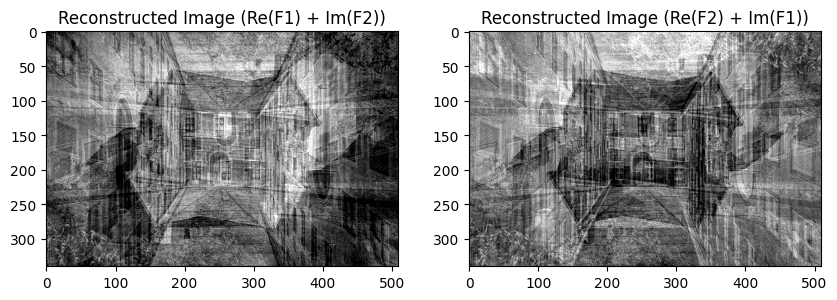

In [41]:
im1_ = fp.ifft2(np.vectorize(complex)(im1_fft.real, im2_fft.imag)).real
im2_ = fp.ifft2(np.vectorize(complex)(im2_fft.real, im1_fft.imag)).real

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(np.clip(im1_,0,255), cmap='gray')
plt.title('Reconstructed Image (Re(F1) + Im(F2))')

plt.subplot(1,2,2)
plt.imshow(np.clip(im2_,0,255), cmap='gray')
plt.title('Reconstructed Image (Re(F2) + Im(F1))')

plt.show()

#Convolution

Convolution is an operation that operates on two images, one being an input image and the other one being a mask (also called the kernel) as a filter on the input image, producing an output image.

Convolution filtering is used to modify the spatial frequency characteristics of an image. It works by determining the value of a central pixel by adding the weighted values of all of its neighbors together to compute the new value of the pixel in the output image. The pixel values in the output image are computed by traversing the kernel window through the input image

<center>
<figure>
<img src='https://raw.githubusercontent.com/juccaicedoac03/Computer_Vision_Course/main/Images/Convolution.png' width="1000"> 
</center>

$$ g(x,y) = f*K = \sum_{u=-h}^{h}\sum_{v=-h}^{h} f(x-u,y-v) K(u,v) $$

<center>
<figure>
<img src='https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif' width="500"> 
<center>

## Applying convolution to a grayscale image

In [52]:
from scipy import signal

In [42]:
!gdown 179MmDSWojZ259nndapuLarFD8wfrRzCp

Downloading...
From: https://drive.google.com/uc?id=179MmDSWojZ259nndapuLarFD8wfrRzCp
To: /content/cameraman.jpg
100% 19.1k/19.1k [00:00<00:00, 40.6MB/s]


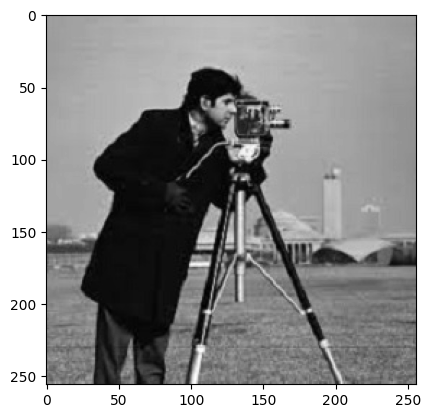

In [45]:
im = cv2.cvtColor(cv2.imread('/content/cameraman.jpg'),cv2.COLOR_BGR2GRAY).astype(float)

plt.imshow(im,'gray')
plt.show()

In [47]:
blur_box_kernel = np.ones((3,3)) / 9
edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])

print('blur box kernel: \n', blur_box_kernel)
print('edge laplace kernel: \n', edge_laplace_kernel)

blur box kernel: 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
edge laplace kernel: 
 [[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


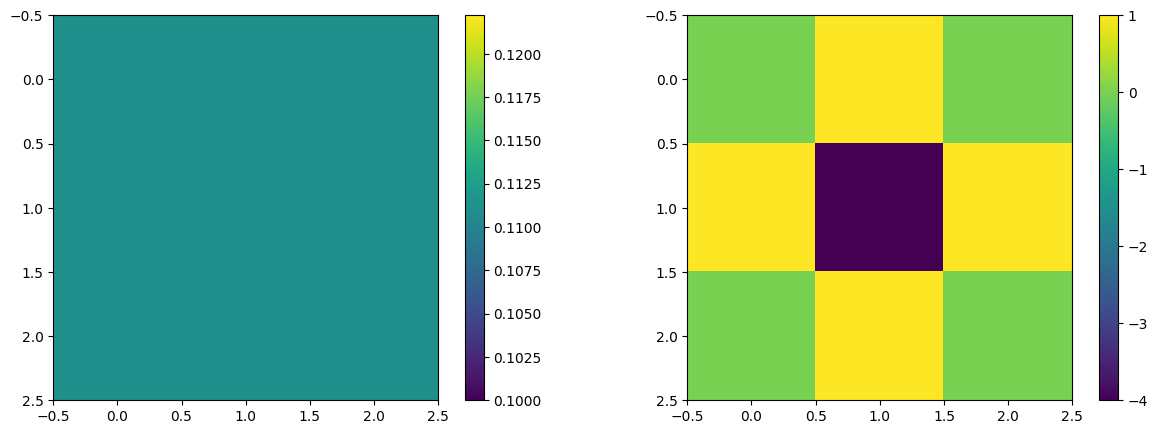

In [51]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.imshow(blur_box_kernel)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(edge_laplace_kernel)
plt.colorbar()

plt.show()

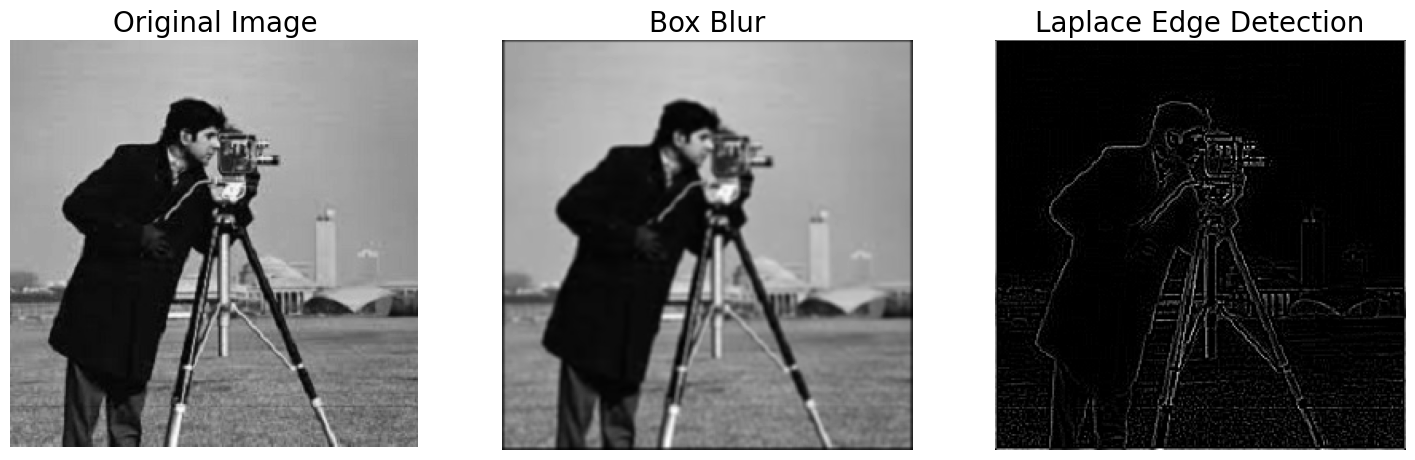

In [55]:
im_blurred = signal.convolve2d(im, blur_box_kernel)
im_edges = np.clip(signal.convolve2d(im, edge_laplace_kernel), 0, 255)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(18,6))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_blurred, cmap='gray')
axes[1].set_title('Box Blur', size=20)
axes[2].imshow(im_edges, cmap='gray')
axes[2].set_title('Laplace Edge Detection', size=20)
for ax in axes:
    ax.axis('off')
plt.show()

## Applying convolution to a color (RGB) image

In [56]:
!gdown 1FdXcyOwreJYdRQMNBjh6LIndTCFPrXL2

Downloading...
From: https://drive.google.com/uc?id=1FdXcyOwreJYdRQMNBjh6LIndTCFPrXL2
To: /content/tajmahal.jpg
100% 529k/529k [00:00<00:00, 132MB/s]


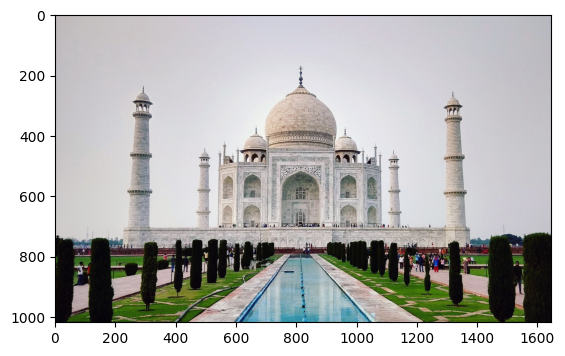

In [67]:
im = cv2.imread('/content/tajmahal.jpg')[:,:,::-1]/255

plt.imshow(im,'gray')
plt.show()

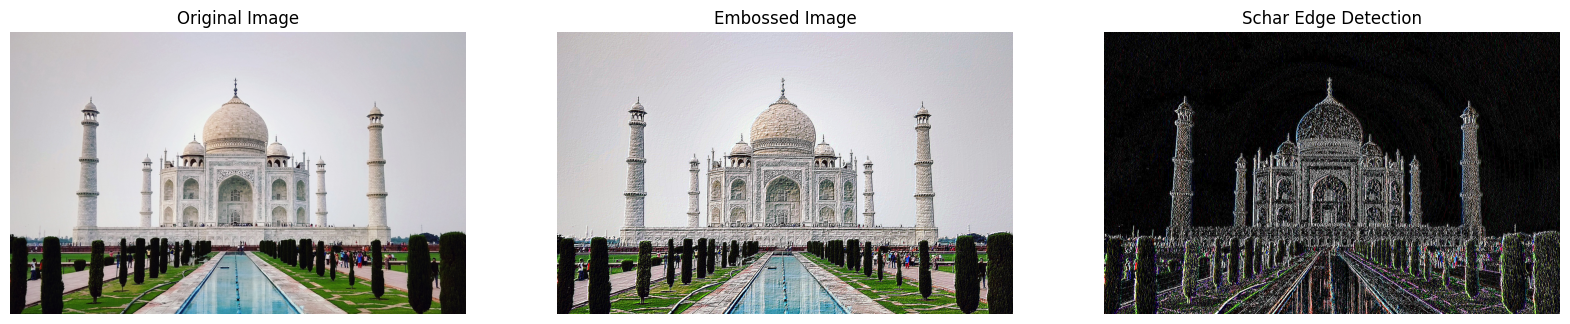

In [72]:
emboss_kernel = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
edge_schar_kernel = np.array([[ -3-3j, 0-10j, +3 -3j], [-10+0j, 0+ 0j, +10+0j], [ -3+3j, 0+10j, +3 +3j]])

im_embossed = np.ones(im.shape)
im_edges = np.ones(im.shape)
for i in range(3):
    im_embossed[...,i] = np.clip(signal.convolve2d(im[...,i], emboss_kernel, mode='same', boundary="symm"),0,1)
for i in range(3):
    im_edges[:,:,i] = np.clip(np.real(signal.convolve2d(im[...,i], edge_schar_kernel, mode='same', boundary="symm")),0,1)


fig, axes = plt.subplots(ncols=3,figsize=(20,10))
axes[0].imshow(im)
axes[0].set_title('Original Image')
axes[1].imshow(im_embossed)
axes[1].set_title('Embossed Image')
axes[2].imshow(im_edges)
axes[2].set_title('Schar Edge Detection')
for ax in axes:
    ax.axis('off')
plt.show()

## Convolution theorem

The convolution theorem says that convolution in an image domain is equivalent to a simple multiplication in the frequency domain:

$$ f(x,y)*h(x,y) ⇔ F(u,v)H(u,v) $$


<center><figure><img src='https://raw.githubusercontent.com/juccaicedoac03/Computer_Vision_Course/main/Images/ConvTheo.png' width="1000"> </center>

In [76]:
import scipy.fftpack as fp

In [73]:
!gdown 1CyQHFbWg6CgsBEjcfv5hDP2ElGbzN1Gb

Downloading...
From: https://drive.google.com/uc?id=1CyQHFbWg6CgsBEjcfv5hDP2ElGbzN1Gb
To: /content/lena.jpg
100% 7.55k/7.55k [00:00<00:00, 17.6MB/s]


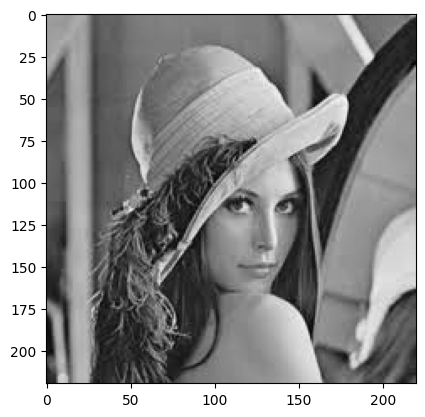

In [75]:
im = cv2.cvtColor(cv2.imread('/content/lena.jpg'),cv2.COLOR_BGR2GRAY)

plt.imshow(im,'gray')
plt.show()

In [78]:
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 5), signal.gaussian(im.shape[1], 5))

freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))

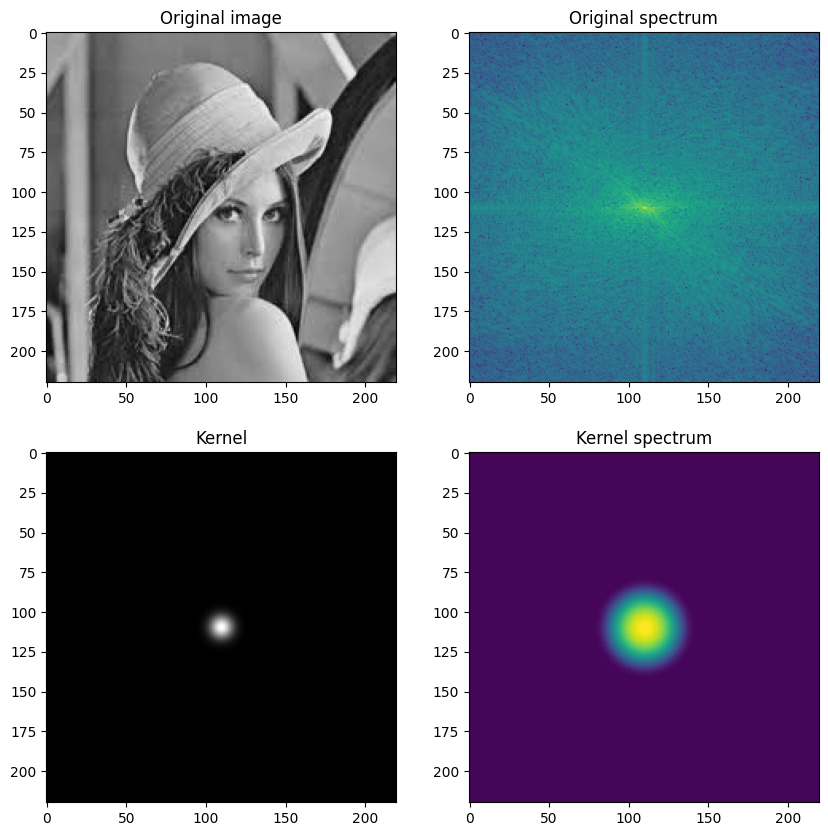

In [86]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(im,'gray')
plt.title('Original image')

plt.subplot(2,2,2)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(abs(freq)))).astype(int))
plt.title('Original spectrum')

plt.subplot(2,2,3)
plt.imshow(gauss_kernel,'gray')
plt.title('Kernel')

plt.subplot(2,2,4)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(abs(freq_kernel)))).astype(int))
plt.title('Kernel spectrum')



plt.show()

In [87]:
convolved = freq*freq_kernel # by the convolution theorem, simply multiply in the frequency domain
im_rec = fp.ifft2(convolved).real

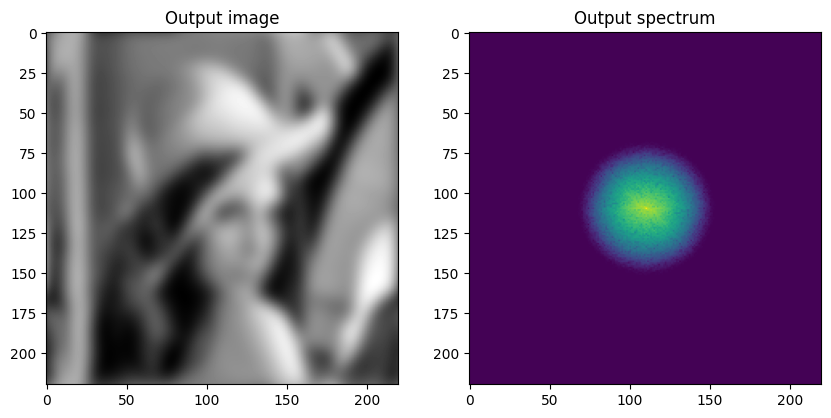

In [92]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(im_rec,'gray')
plt.title('Output image')

plt.subplot(1,2,2)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(abs(convolved)))).astype(int))
plt.title('Output spectrum')

plt.show()

## Frequency domain filter with scipy signal fftconvolve()

In [96]:
import scipy.fftpack as fftpack

In [93]:
!gdown 1Gad_MvasjVhgd5SFaZdwS-nUkV1uTdHO

Downloading...
From: https://drive.google.com/uc?id=1Gad_MvasjVhgd5SFaZdwS-nUkV1uTdHO
To: /content/mandrill.jpg
100% 11.4k/11.4k [00:00<00:00, 26.0MB/s]


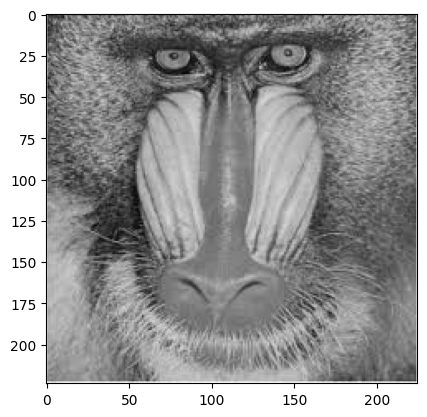

In [94]:
im = cv2.cvtColor(cv2.imread('/content/mandrill.jpg'),cv2.COLOR_BGR2GRAY)

plt.imshow(im,'gray')
plt.show()

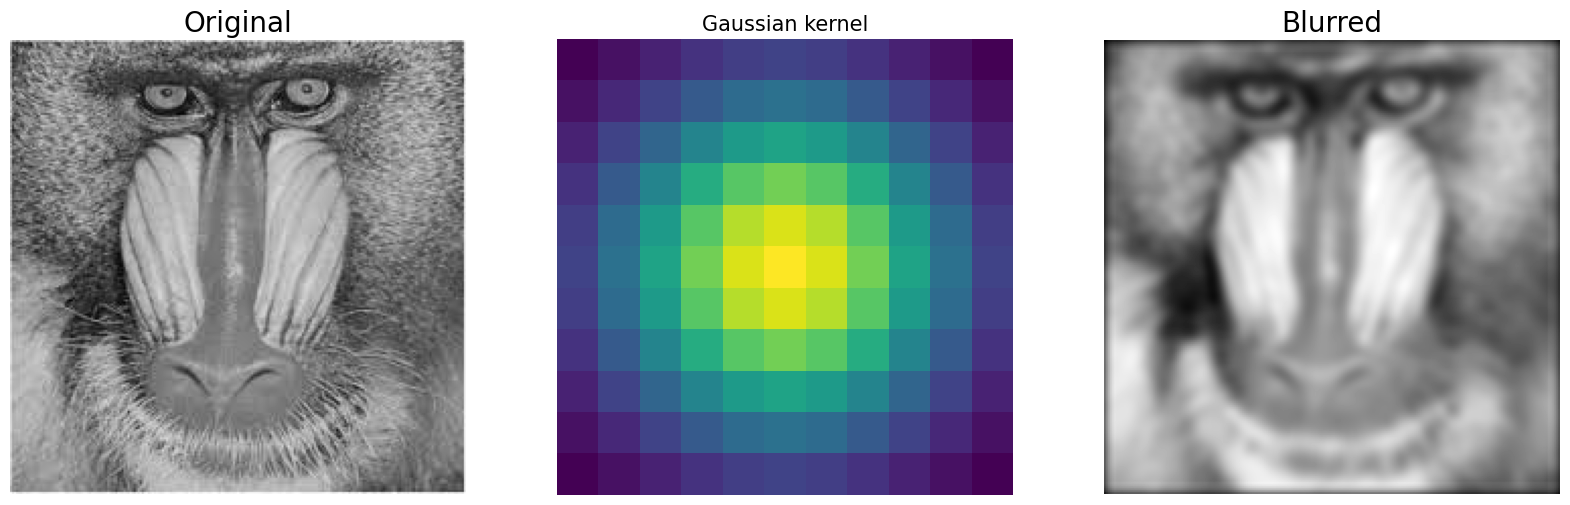

In [95]:
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) # 2D Gaussian kernel of size 11x11 with σ = 3
im_blurred = signal.fftconvolve(im, gauss_kernel, mode='same')
fig, (ax_original, ax_kernel, ax_blurred) = plt.subplots(1, 3, figsize=(20,8))
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()
ax_kernel.imshow(gauss_kernel)
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.set_axis_off()
ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()
fig.show()

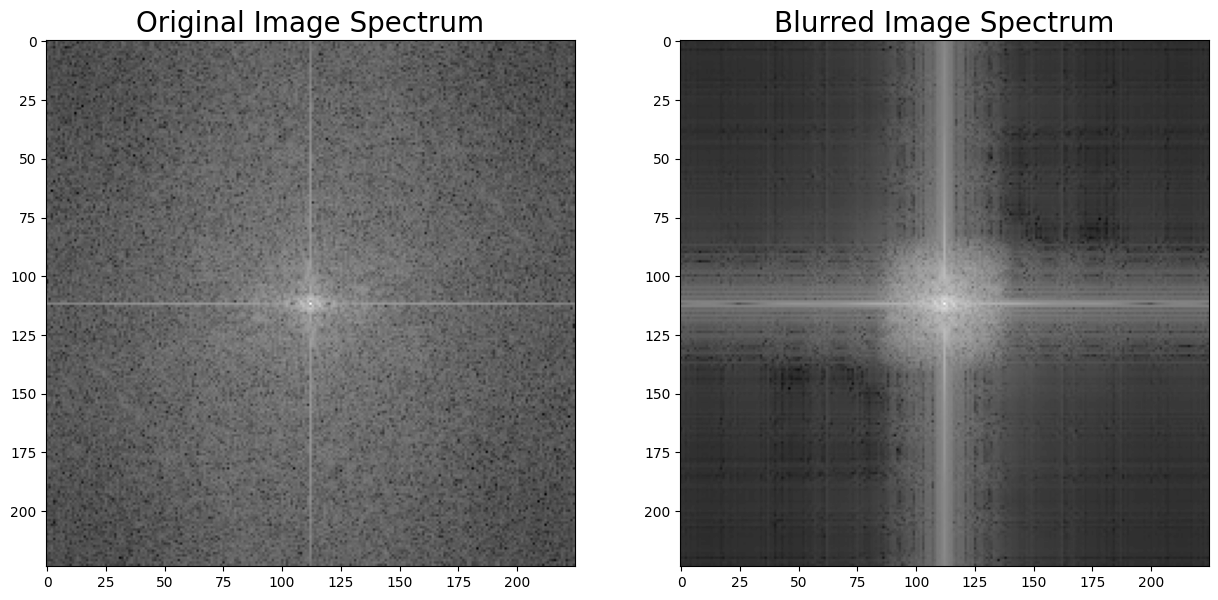

In [99]:
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )
plt.figure(figsize=(15,8))
plt.subplot(1,2,1), plt.imshow( (20*np.log10( 0.1 + abs(F2))).astype(int), cmap=plt.cm.gray)
plt.title('Original Image Spectrum', size=20)
F1 = fftpack.fft2((im_blurred).astype(float))
F2 = fftpack.fftshift( F1 )
plt.subplot(1,2,2), plt.imshow( (20*np.log10( 0.1 + abs(F2))).astype(int), cmap=plt.cm.gray)
plt.title('Blurred Image Spectrum', size=20)
plt.show()

## Ejercicio: Aplicar una convolución en el espacio de la frecuencia a una imágen RGB y mostrar la imágen original, el kernel, sus respectivos espectros y las resultantes.